<h1>Algortimos: Knn e K-means </h1>
<p><b>Bases de dados Iris e Boston</b></p>
<p>Alunos: David Walter Jansen e Eike Stálei</p>

<p>Resumo: Uso dos algoritmos de aprendizagem Knn e K-means sobre as bases de dados Iris e Boston. O Knn utiliza um aprendizado supervisionado com foco em classificação. O K-menas utiliza aprendizado não supervisionado.</p>

<h2>1) Introdução</h2>
<p> Ambas as bases de dados utilizadas podem ser importadas facilmente da <i>sklearn.datasets</i>. Após a importação, é possível convertê-las para o formato de <i>Data Frame</i> para facilitar a visualização dos dados. O devido conhecimento do formato dos dados, nos permitirá aplicar os algoritmos Knn e K-means.</p>

<p>Nomeamos o target da Iris de <i>Class</i> e o target da Boston de <i>Value</i>.</p>

In [1]:
#Importações
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston

iris = load_iris()
table_iris = pd.DataFrame(iris.data)
table_iris.columns = iris.feature_names
table_iris['Class'] = iris.target

boston = load_boston()
table_boston = pd.DataFrame(boston.data)
table_boston.columns = boston.feature_names
table_boston['Value'] = boston.target

In [2]:
#EXIBIÇÃO: iris
table_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
#EXIBIÇÃO: boston
table_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h3>1.1) Códigos</h3>

<p>Abaixo estão os códigos desenvolvidos para esse trabalho e utilizados em nossa metodologia.</p>

In [4]:
#Knn
import numpy as np
class MyKnn:

    kneighbor = None
    instances = None
    numOfInstances = None
    classification = None
    classes = None
    numOfClasses = None
    
    #inicialização da classe
    def __init__(self, kneighbor):
        self.kneighbor = kneighbor
    
    #distancia euclidiana
    def distEuclid (self, x, y):
        sizeX = len(x)
        sizeY = len(y)
        if sizeX != sizeY :
            print("Error: incompatible dimensions")
            return False

        result = 0
        for i in range(sizeX):
            result = result + (x[i] - y[i])**2

        return (result)**(1/2)
    
    #armazena os dados para aprendizagem supervisionada
    def fit (self, instances, classification):
        self.instances = instances
        self.numOfInstances = len(instances)
        self.classification = classification
        r  = len(classification)
        self.classes = np.array(classification[0])
        for i in range(r):
            if classification[i] not in self.classes :
                self.classes = np.append(self.classes, classification[i])
        
        self.numOfClasses = len(self.classes)
    
    #avaliação dos vizinhos mais próximos para predizer a classe de cada elemento
    def predict(self, x):
        [r, c] = x.shape
        y = np.zeros(r, dtype = self.classification.dtype)
        
        for i in range(r):
            store = x[i, :]
            dist_neighbor = np.zeros(self.numOfInstances)
            for j in range(self.numOfInstances):
                dist_neighbor[j] = self.distEuclid(store, self.instances[j])
            
            dist_index = np.argsort(dist_neighbor)
            election = np.zeros(self.numOfClasses)
            
            for k in range(self.kneighbor):
                for z in range(self.numOfClasses):
                    if (self.classification[dist_index[k]] == self.classes[z]) :
                        election[z] = election[z] + 1
                        break
            
            y[i] = self.classes[np.argmax(election)]
            
        return y
    
    def score(self, x, correct):
        y = self.predict(x)
        success = 0
        for i in range(len(x)):
            if y[i] == correct[i] :
                success = success + 1
                
        return success * 100/len(x)

In [5]:
#K-means
#1 inicializar centroides aleaotiramente
#2 para cada ponto na base de dados, calcular distância para cada centroide
#e associar ao que estiver mais perto
#3 calcular média de todos os pontos ligados a cada centrodide e definir
#um novo centroide (repetir etapas 2 e 3)
class MyKMeans:
    
    k = None
    centers = None
    numInCenter = None
    instances = None
    
    def __init__(self, k):
        self.k = k
    
    #distancia euclidiana
    def distEuclid (self, x, y):
        sizeX = len(x)
        sizeY = len(y)
        if sizeX != sizeY :
            print("Error: incompatible dimensions")
            return False

        result = 0
        for i in range(sizeX):
            result = result + (x[i] - y[i])**2

        return (result)**(1/2)
    
    #atualização das coordenadas de cada centro quando ocorre adição de novo valor
    def upCenter(self, indCenter, instance):
        temp = len(instance) - 1
        for j in range(temp):
            self.centers[indCenter][j] *= self.numInCenter[indCenter]
            self.centers[indCenter][j] += instance[j]
            self.centers[indCenter][j] = self.centers[indCenter][j]/(self.numInCenter[indCenter] + 1)
        
        self.numInCenter[indCenter] += 1
    
    #atualização das coordenadas de cada centro quando muda algum elmento de agrupamento
    def refactorCenter(self, indCenter, i, instance):
        previousCenter = int(self.instances[i, -1]) #acessar a última coluna da linha i
        temp = len(instance) - 1
        
        for j in range(temp):
            self.centers[previousCenter][j] *= self.numInCenter[previousCenter]
            self.centers[previousCenter][j] -= instance[j]
            self.centers[previousCenter][j] = self.centers[previousCenter][j]/(self.numInCenter[previousCenter] - 1)
        
        self.numInCenter[previousCenter] -= 1        
        self.upCenter(indCenter, instance)
     
    #determinação dos centros com base em aprendizagem não supervisionada
    def fit (self, instances):        
        self.instances = instances
        [r , c] = instances.shape        
        minCoordCenter = np.zeros(c)
        maxCoordCenter = np.zeros(c)
        self.instances = np.c_[self.instances, (-1)*np.ones((r,1))]
        
        #valores máximos e mínimos de todas as coordenadas
        for j in range(c):
            minCoordCenter[j] = min(instances[:,j])
            maxCoordCenter[j] = max(instances[:,j])
        
        self.centers = np.zeros((self.k,c))
        self.numInCenter = np.ones(self.k)
        
        #determinação de K centros iniciais utilizando o intervalo de máximos e mínomos para cada variável
        for k in range(self.k):
            for j in range(c):
                self.centers[k,j] = np.random.uniform(minCoordCenter[j], maxCoordCenter[j])
        
        #executa até que ocorra convergência dos centros.
        while(True):
            flag = 0
            for i in range(r):
                minDist = 10*100*100
                indCenterMinDist = None
                # decide qual centro mais próximo
                for k in range(self.k):
                    temp = self.distEuclid(self.centers[k], self.instances[i,:-1])
                    if minDist > temp:
                        minDist = temp
                        indCenterMinDist = k
                # verfica se está alterando um valor de centro. marca na última coluna o indice do centro
                if self.instances[i, c] == -1 :
                    self.instances[i, c] = indCenterMinDist
                    self.upCenter(indCenterMinDist, self.instances[i])
                    flag = 1
                elif self.instances[i, c] != indCenterMinDist :
                    self.refactorCenter(indCenterMinDist, i, self.instances[i])
                    self.instances[i, c] = indCenterMinDist
                    flag = 1
            
            if flag == 0 :
                break
    
    #verifica a próximidade de cada elemento de x com os centros do agrupamento.
    def predict(self, x):
        [r, c] = x.shape
        y = np.zeros(r, dtype = 'int32')
        for i in range(r):
            minDist = 10*100*100
            indCenterMinDist = None
            # decide qual centro mais próximo
            for k in range(self.k):
                temp = self.distEuclid(self.centers[k], x[i])
                if minDist > temp:
                    minDist = temp
                    indCenterMinDist = k
            y[i] = indCenterMinDist
        return y

<h2>2) Metodologia</h2>
<p>Notemos pela tabela de Boston que seus valores para o target são contínuos. O Knn é um algoritmo que, tradicionalmente, trabalha com classificação, ou seja, uma divisão discreta do target. Para corrigir essa diferença no formato dos dados iremos realizar o seguinte procedimento:</p>

<ol>
    <li>Ordenar a coluna do target de Boston em ordem crescente.</li>
    <li>Realizar 4 partiçãoes na coluna do target.</li>
    <li>Atribuir uma <i>Classe</i>, representada por um número, às linhas que pertencem ao mesmo intervalo de partição.</li>
</ol>

<p>Como conseguência do procedimento acima, obtemos uma discretizção da base de dados Boston, em função de seus intervalos de preços.</p>

In [6]:
#discretiza os preços em 4 Valores
#table_boston = table_boston.sort_values(by=['Value'])
#table_boston = table_boston.reset_index(drop=True)
#for i in range(126):
#    table_boston.iloc[i]['Value'] = 4
#
#for i in range(126, 253):
#    table_boston.iloc[i]['Value'] = 3
#
#for i in range(253, 380):
#    table_boston.iloc[i]['Value'] = 2
#
#for i in range(380, 506):
#    table_boston.iloc[i]['Value'] = 1
#    
#table_boston['Value'] = pd.to_numeric(table_boston['Value'])
#table_boston['Value'] = table_boston['Value'].astype("int32")

for i in range(506):
    if(table_boston.loc[i]['CRIM'] < 5.0):
        table_boston.iloc[i]['CRIM'] = 1 #'Muito Seguro'
        
    elif(5.0 <= table_boston.loc[i]['CRIM'] and table_boston.loc[i]['CRIM'] < 10.0):
        table_boston.iloc[i]['CRIM'] = 2 #'Seguro'
        
    elif(10.0 <= table_boston.loc[i]['CRIM'] and table_boston.loc[i]['CRIM'] < 25.0):
        table_boston.iloc[i]['CRIM'] = 3 #'Segurança Moderada'
    
    elif(25.0 <= table_boston.loc[i]['CRIM'] and table_boston.loc[i]['CRIM'] < 45.0):
        table_boston.iloc[i]['CRIM'] = 4 #'Risco'
        
    elif(45.0 <= table_boston.loc[i]['CRIM'] and table_boston.loc[i]['CRIM'] < 90.0):
        table_boston.iloc[i]['CRIM'] = 5 #'Alto Risco'
        
table_boston['CRIM'] = table_boston['CRIM'].astype("int32")

In [7]:
#EXIBIÇÃO: boston discretizada
table_boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Value
0,1,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,1,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,1,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,1,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,1,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,1,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


<h3>2.1) Iris</h3>

<p>Para realizar a classificação da Iris, utilizamos o Knn desenvolvido nesse trabalho. Primeiramente realizamos a divisão entre as características e o target de classificação. Uma parte dessas informações forem realizadas para a aprendizagem supervisionada do algoritmo, e uma outra das informações foram usadas para realizar a verificação da classificação. Mostramos também o score, que para a Iris, alcança 100% quando a partição realizada utiliza 5 vizinhos mais próximos.</p>

In [8]:
knn = MyKnn(5)
X = iris.data[:,:3] #as caracteristicas
y = iris.target #classificacao
#dados de treinamento 'até 40' de cada classe
xt = np.concatenate([X[:40,:], X[51:90,:], X[101:140,:]])
yt = np.concatenate([y[:40], y[51:90], y[101:140]])
knn.fit(xt, yt)

#validacão com o restante dos dados
xv = np.concatenate([X[40:50,:], X[90:100,:], X[140:150,:]])
yv = np.concatenate([y[40:50], y[90:100], y[140:150]])
yp = knn.predict(xv)

print(yp) #resultado encontrado
print(yv) #resultado esperado
print(knn.score(xv, yv))

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
100.0


<p>A aplicação do K-means sobre a Iris utilizou a mesma partição entre o conjunto de dados que fora utilizado no Knn. A grande diferença está no fato de que não utilizamos o aprendizado supervisonado. O K-means trabalha com a estimativa de cortes no conjuntos de dados, tentando realizar um agrupamento de elementos com caracteristicas semelhantes. Para nosso teste, utilizamos uma separação em 3 grupos, pois sabemos de antemão que a classificação da Iris se dá dessa forma.</p>

<p>Notemos que o algoritmo Knn tem maior acerto na comparação com o K-means para esse exmplo.<p>

In [27]:
kmeans = MyKMeans(3)
X = iris.data[:,:3] #as caracteristicas
y = iris.target #classificacao
#dados de treinamento 'até 40' de cada classe
xt = np.concatenate([X[:40,:], X[51:90,:], X[101:140,:]])
yt = np.concatenate([y[:40], y[51:90], y[101:140]])
kmeans.fit(xt)

xv = np.concatenate([X[40:50,:], X[90:100,:], X[140:150,:]])
yv = np.concatenate([y[40:50], y[90:100], y[140:150]])
yp = kmeans.predict(xv)
print(yp) #resultado encontrado
print(yv)

[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


<h4>2.2.1) Gráfico de separação para a Iris</h4>

<Figure size 1080x1080 with 0 Axes>

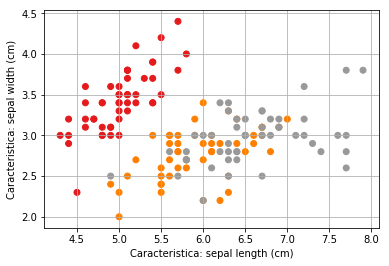

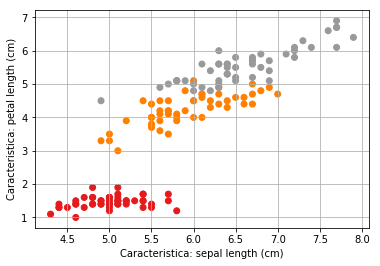

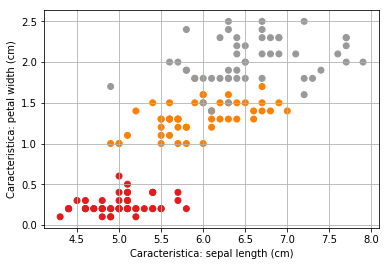

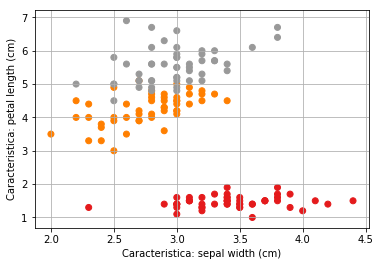

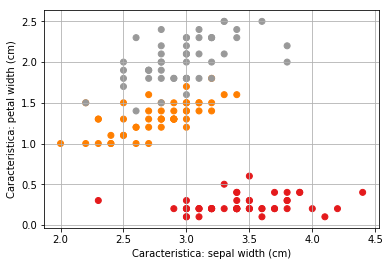

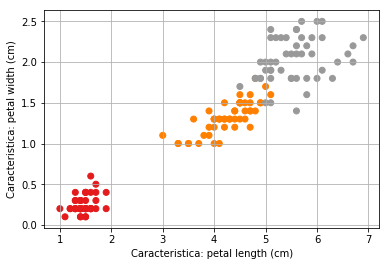

In [17]:
import matplotlib.pyplot as plt

names = iris.feature_names
X = table_iris[names] #as caracteristicas
y = table_iris['Class'] #classificacao

plt.figure(figsize=(15,15))
for i in range(4):
    for j in range(i+1, 4):
        if (i != j):
            plt.subplots()
            plt.scatter(X.iloc[:, i], X.iloc[:, j], c=y, cmap=plt.cm.Set1)
            plt.xlabel("Caracteristica: %s" %names[i])
            plt.ylabel("Caracteristica: %s" %names[j])
            plt.grid(True)
plt.show()

<h3>2.2) Boston</h3>

<p>A classificação da Boston foi feito mediante a discretização da coluna <i>CRIM</i> para estabelecer as classes. Assim, o <i>antigo target</i> foi usado com uma característica, e o <i>CRIM</i> se tornou o novo target. Assim como na Iris, utilizou-se do algoritmo KNN implementado nesse trabalho para a classificação com base em aprendizado supervisionado. A divisão da base da dados em grupo de <b>train</b> e <b>test</b> utilizou a função <i>train_test_split</i>, e no tamanho do <b>test</b>  foram agrupados, randomicamente, 30% dos elementos da Boston.</p>
<p>Através da função <i>score</i>, mostramos o resultado obtido de aproximadamente 87% de precisão na predição do nosso Knn para 3 vizinhos mais próximos.</p>
<p>Note que, como a Boston não é nativamente de classificação, o resultado foi inferior em precisão se comparado com a Iris.</p>

In [11]:
from sklearn.model_selection import train_test_split
knn = MyKnn(3)

names = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Value']

X = table_boston[names] #as caracteristicas
y = table_boston['CRIM'] #classificacao
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

xt = np.array(X_train)
yt = np.array(y_train)
knn.fit(xt, yt)

xv = np.array(X_test)
yv = np.array(y_test)
yp = knn.predict(xv)

print(yp) #resultado encontrado
print(yv) #resultado esperado
print(knn.score(xv, yv))

[1 2 1 3 1 1 1 1 1 1 3 3 2 3 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 3
 1 2 2 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 3 1 3 1 1 1 1 1 1 1 2 2 1 1 1
 2 1 1 1 1 3 1 2 1 1 2 1 1 1 1 1 1 1 1 2 3 1 1 3 1 1 1 1 3 2 1 1 1 1 1 1 1
 2 3 1 1]
[1 2 1 3 1 1 1 1 1 1 5 3 2 3 1 1 2 1 1 1 1 1 1 1 1 3 1 1 1 1 3 2 1 1 1 1 4
 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 3 1 2 1 3 1 1 1 1 1
 2 3 1 1 1 1 1 1 3 1 1 1 1 3 1 2 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 4 1 1 1 1
 2 1 1 1 1 3 1 3 1 1 2 1 1 1 1 1 1 1 1 2 3 1 1 3 1 1 1 1 3 3 1 1 1 1 1 1 1
 2 3 1 1]
86.84210526315789


<p>Assim como na Iris, a partição entre <b>train</b> e <b>test</b> para a Boston, foi mantida para aplicação em ambos os algoritmos (Knn e K-means). Paro nosso teste, escolhemos 5 agrupamentos. Esse valor se deu com base na discretização que fizemos da coluna <i>CRIM</i> da Boston.</p>

In [12]:
from sklearn.model_selection import train_test_split

kmeans = MyKMeans(5)
names = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Value']

X = table_boston[names] #as caracteristicas
y = table_boston['CRIM'] #classificacao
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

xt = np.array(X_train)
yt = np.array(y_train)
kmeans.fit(xt)

xv = np.array(X_test)
yv = np.array(y_test)

yp = kmeans.predict(xv)
print(yp) #resultado encontrado
print(yv)

[3 2 1 2 3 1 2 1 1 0 4 4 2 2 3 3 2 1 1 1 1 3 3 1 1 4 1 0 1 3 2 2 1 1 1 2 2
 2 4 2 1 1 3 2 3 1 1 3 3 3 0 3 1 1 0 1 1 3 4 1 3 1 1 1 2 3 2 1 4 1 3 3 1 3
 2 2 1 1 1 3 1 3 2 1 1 1 1 4 3 2 3 4 1 3 1 1 2 1 4 1 1 3 1 1 1 1 4 2 1 1 3
 2 1 3 1 1 4 3 2 1 3 2 1 3 1 1 1 1 1 1 2 4 2 3 4 1 1 3 1 4 2 3 1 1 3 1 3 1
 4 2 1 1]
[1 2 1 3 1 1 1 1 1 1 5 3 2 3 1 1 2 1 1 1 1 1 1 1 1 3 1 1 1 1 3 2 1 1 1 1 4
 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 3 1 2 1 3 1 1 1 1 1
 2 3 1 1 1 1 1 1 3 1 1 1 1 3 1 2 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 4 1 1 1 1
 2 1 1 1 1 3 1 3 1 1 2 1 1 1 1 1 1 1 1 2 3 1 1 3 1 1 1 1 3 3 1 1 1 1 1 1 1
 2 3 1 1]


<h4>2.2.1) Gráfico de separação para a Boston</h4>

<Figure size 1080x1080 with 0 Axes>

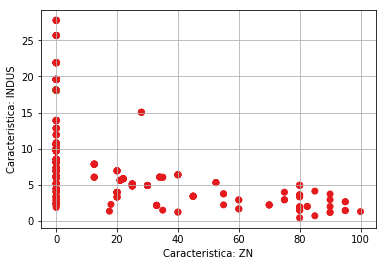

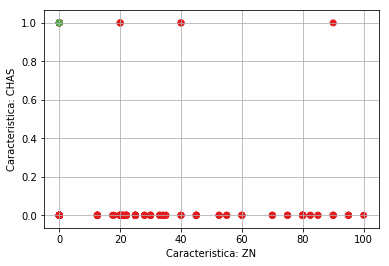

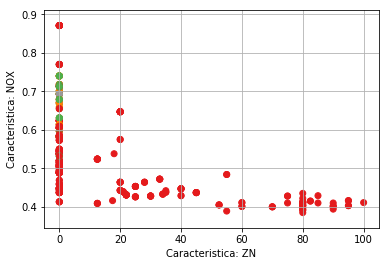

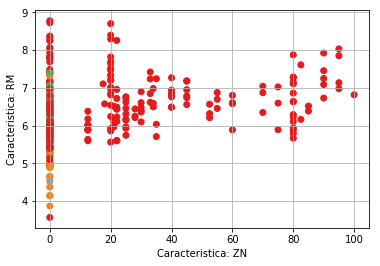

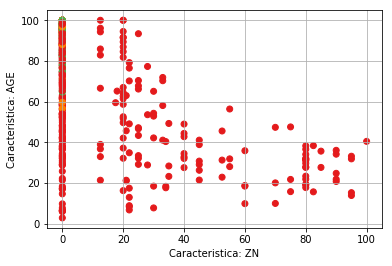

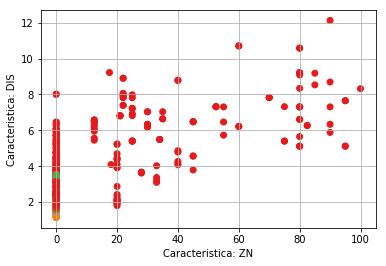

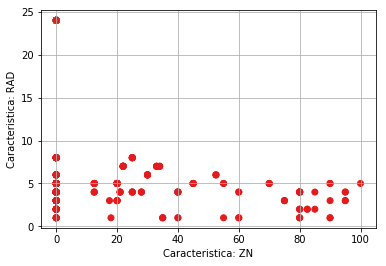

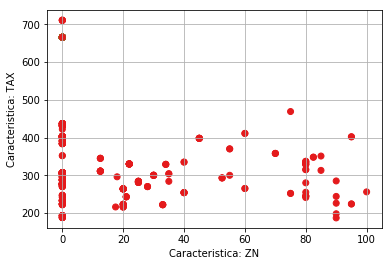

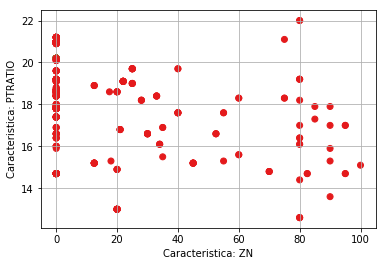

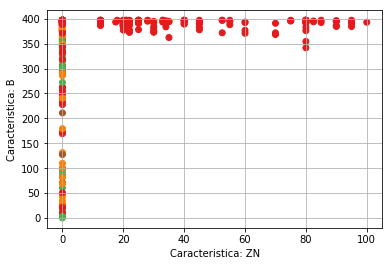

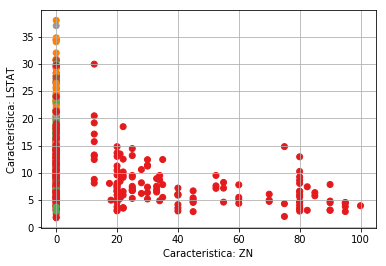

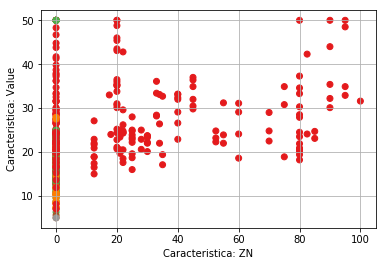

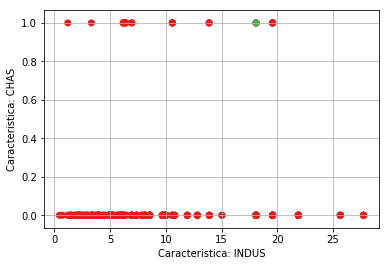

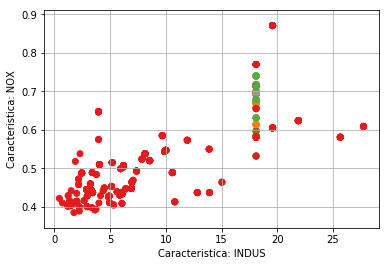

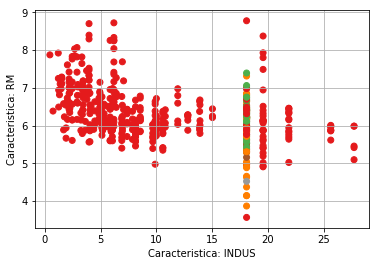

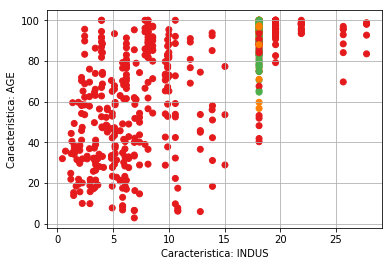

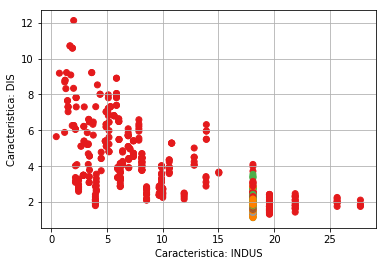

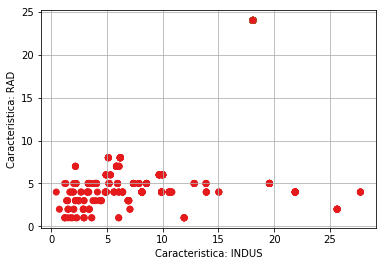

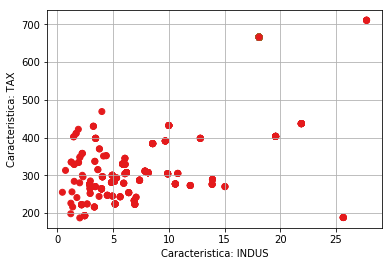

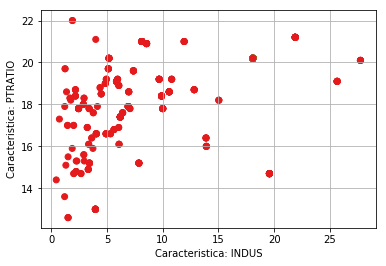

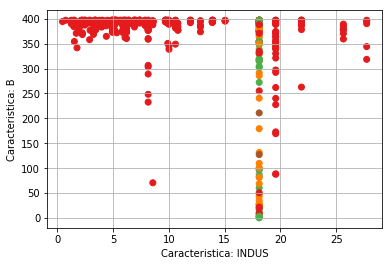

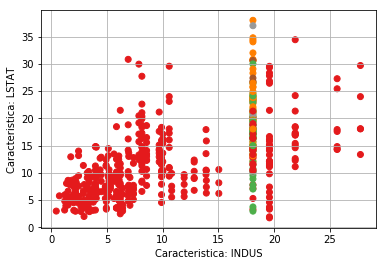

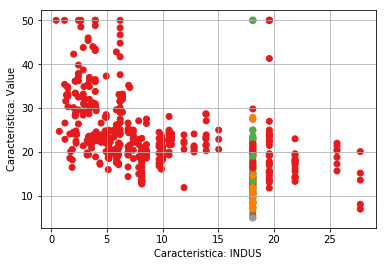

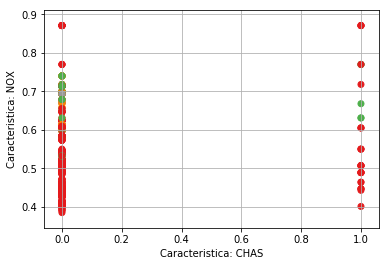

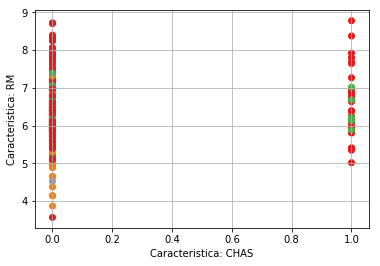

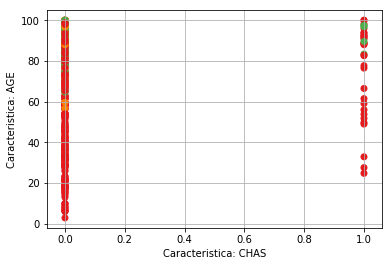

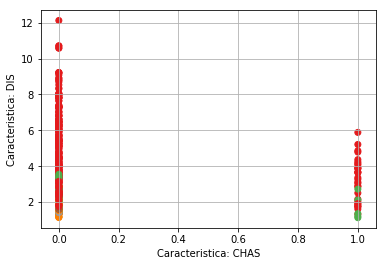

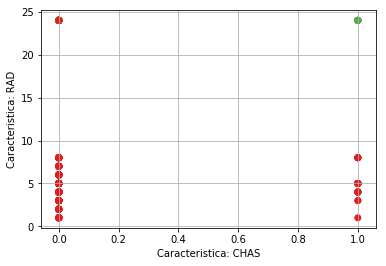

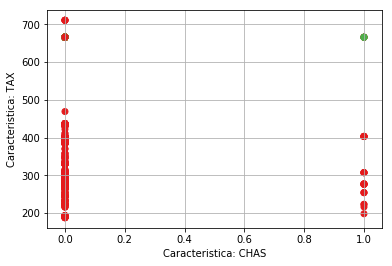

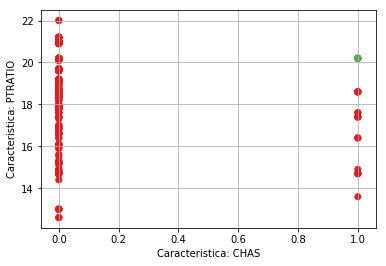

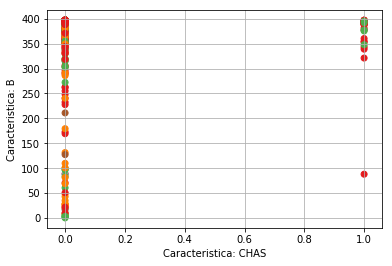

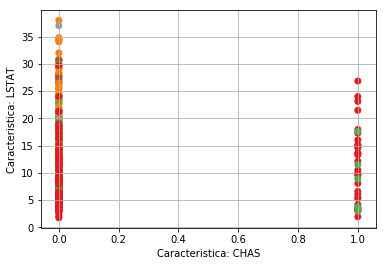

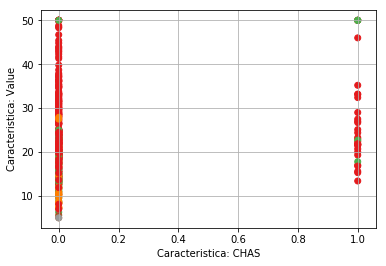

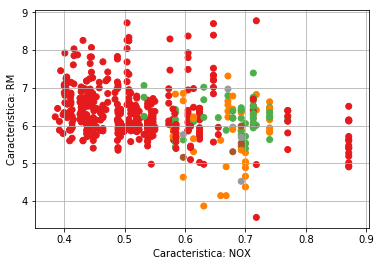

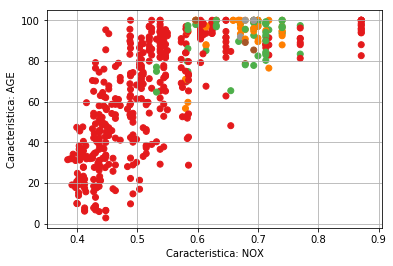

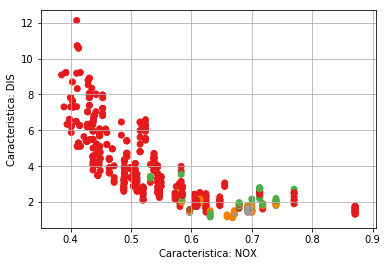

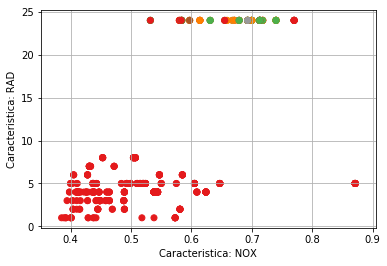

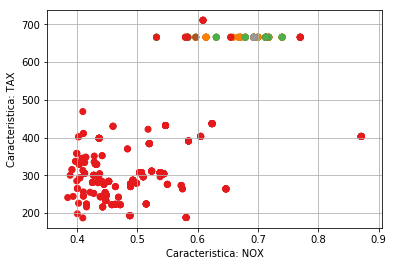

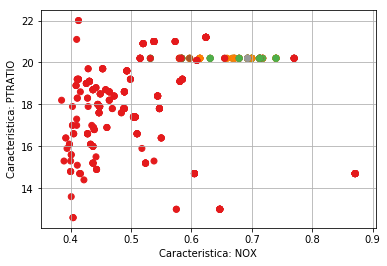

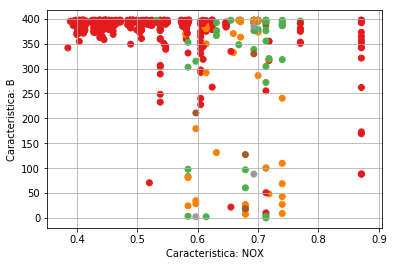

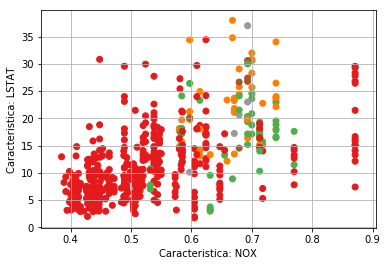

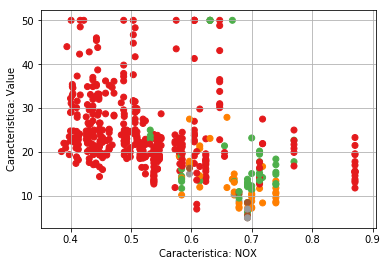

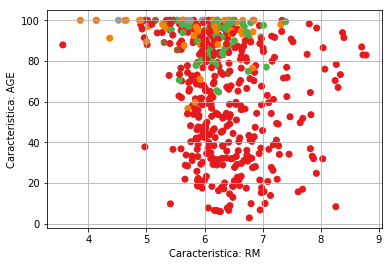

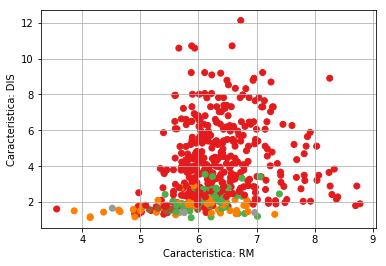

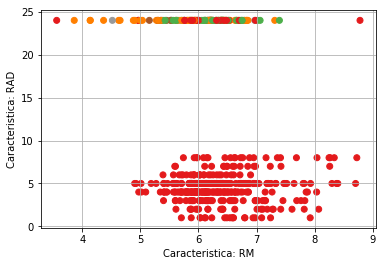

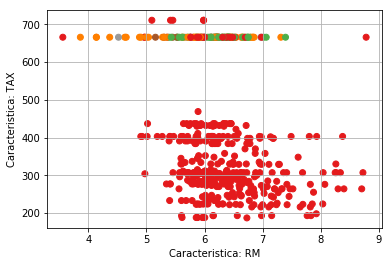

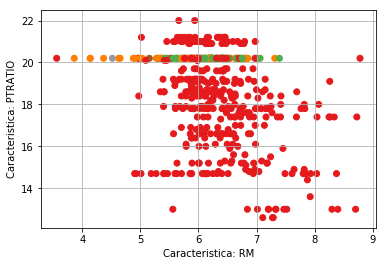

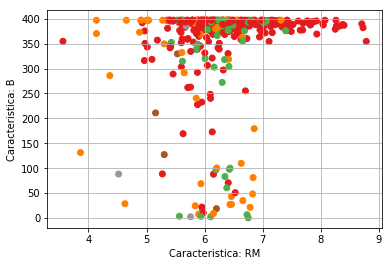

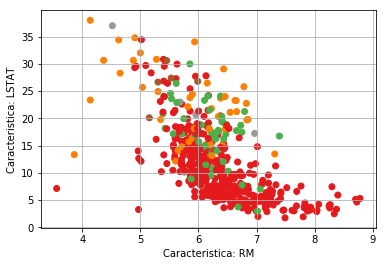

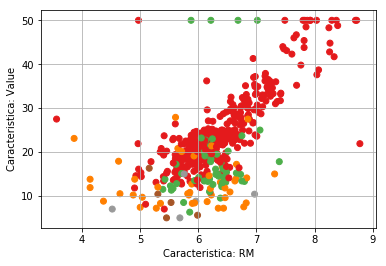

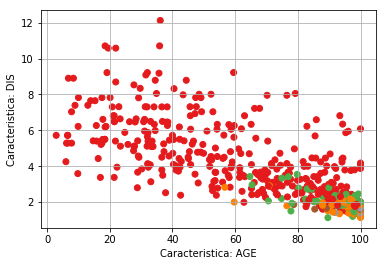

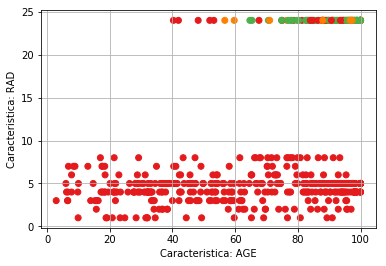

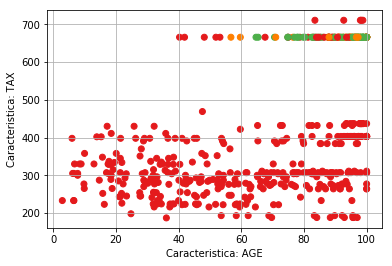

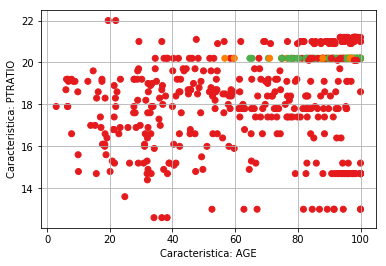

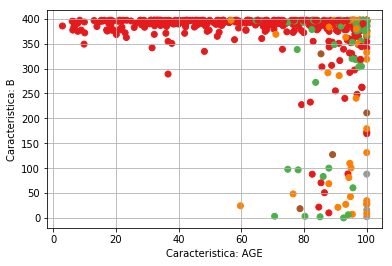

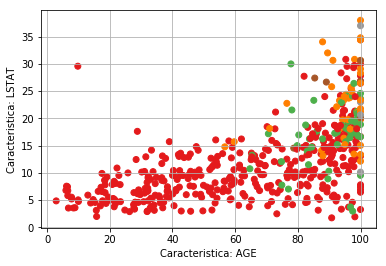

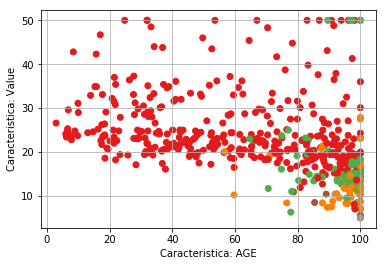

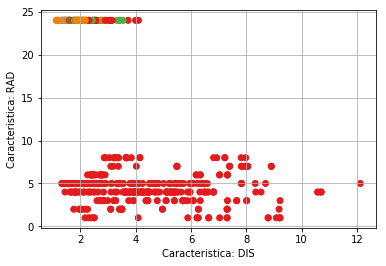

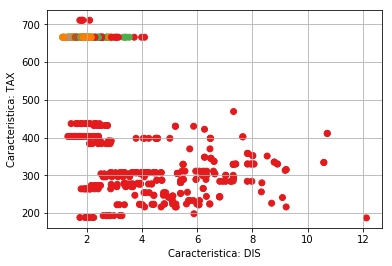

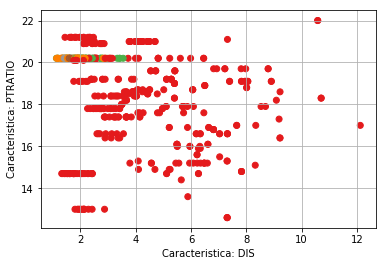

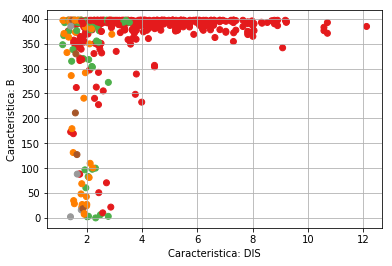

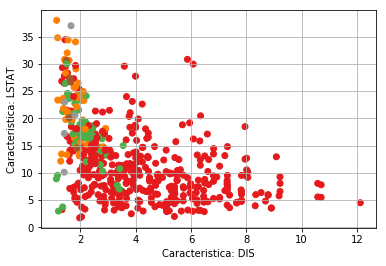

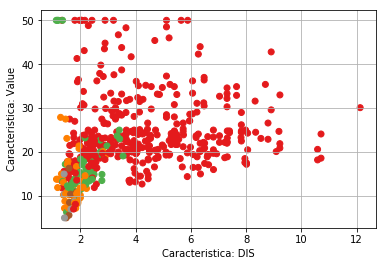

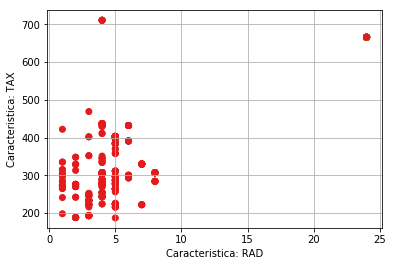

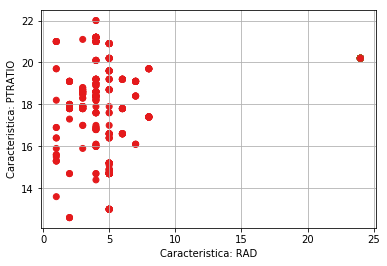

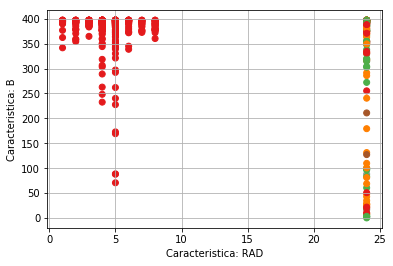

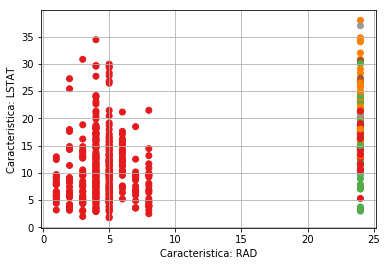

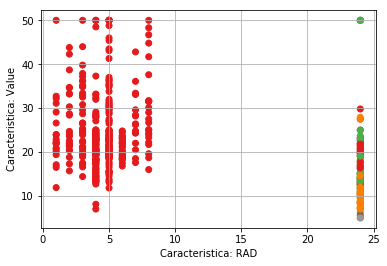

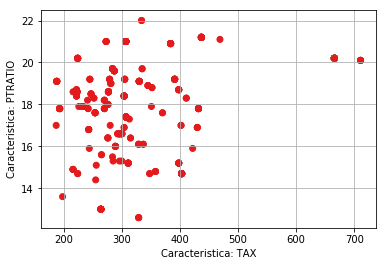

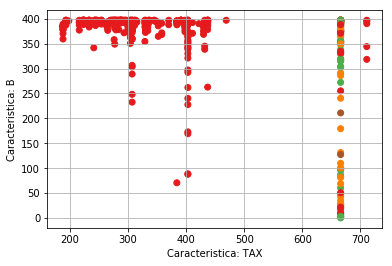

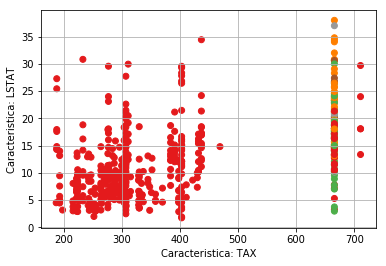

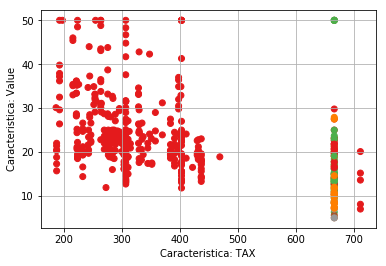

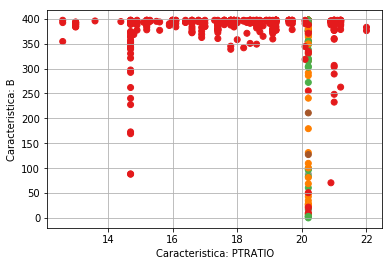

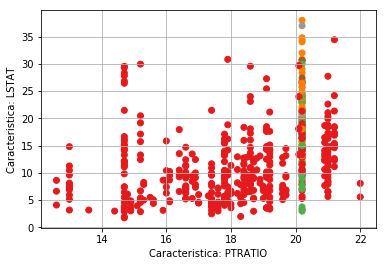

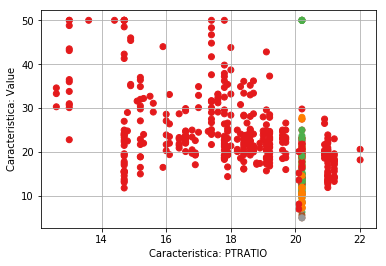

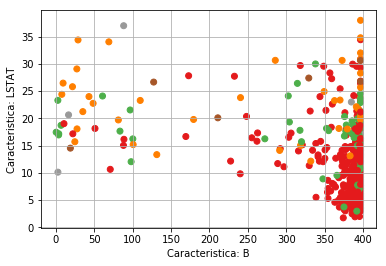

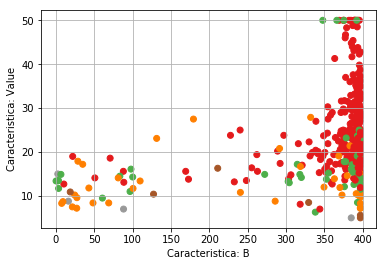

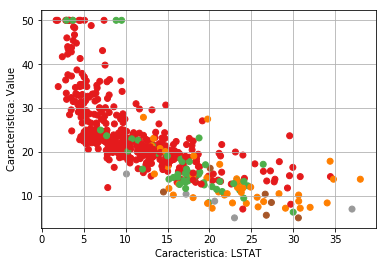

In [16]:
import matplotlib.pyplot as plt

names = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Value']
X = table_boston[names] #as caracteristicas
y = table_boston['CRIM'] #classificacao

plt.figure(figsize=(15,15))
for i in range(13):
    for j in range(i+1, 13):
        if (i != j):
            plt.subplots()
            plt.scatter(X.iloc[:, i], X.iloc[:, j], c=y, cmap=plt.cm.Set1)
            plt.xlabel("Caracteristica: %s" %names[i])
            plt.ylabel("Caracteristica: %s" %names[j])
            plt.grid(True)
plt.show()